In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable 'species' to the DataFrame
iris_df['species'] = iris.target_names[iris.target]

# Display the first few rows of the DataFrame
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")


C:\Users\BAHU Computers\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


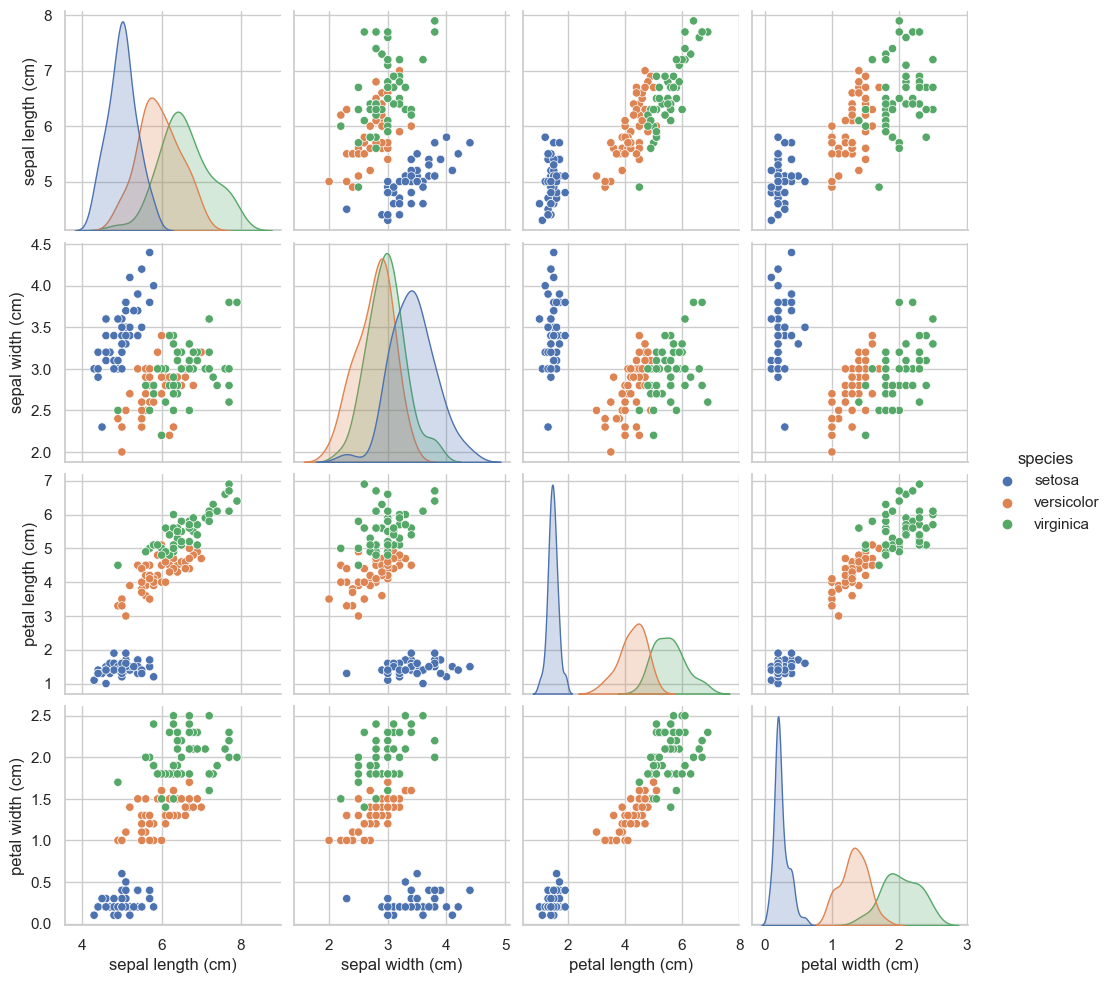

In [7]:
# Pairplot to visualize relationships between features and species
sns.pairplot(iris_df, hue='species', height=2.5)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)


In [14]:
# Train the decision tree classifier
classifier.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


C:\Users\BAHU Computers\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


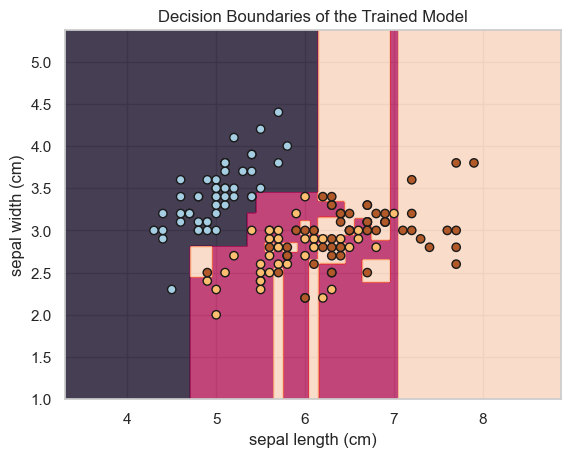

In [20]:
# Visualize decision boundaries with the first two features
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature

# Extract two features for visualization
X_visualization = X.iloc[:, [feature1, feature2]]

# Train the decision tree classifier on the selected features
classifier.fit(X_visualization, y)

# Meshgrid for decision boundary plot
h = .02
x_min, x_max = X_visualization.iloc[:, 0].min() - 1, X_visualization.iloc[:, 0].max() + 1
y_min, y_max = X_visualization.iloc[:, 1].min() - 1, X_visualization.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_visualization.iloc[:, 0], X_visualization.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(X.columns[feature1])
plt.ylabel(X.columns[feature2])
plt.title('Decision Boundaries of the Trained Model')
plt.show()
